In [2]:
#导入库
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

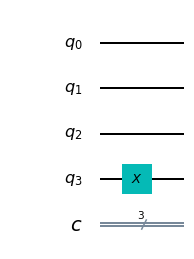

In [3]:
#初始化电路和本征态
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw(output='mpl')

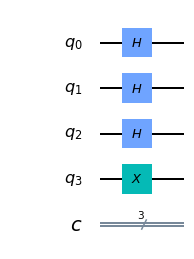

In [4]:
# 对辅助比特应用H门
for qubit in range(3):
    qpe.h(qubit)
qpe.draw(output='mpl')

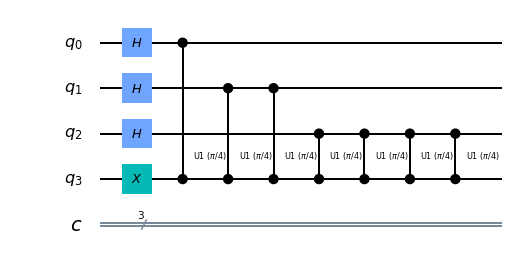

In [5]:
# U运算
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(math.pi/4, counting_qubit, 3); 
    repetitions *= 2
qpe.draw(output='mpl')

In [6]:
def qft_dagger(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

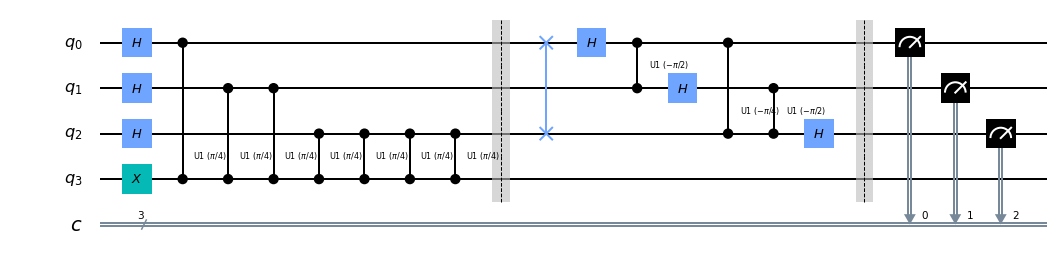

In [7]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
qpe.draw(output="mpl")

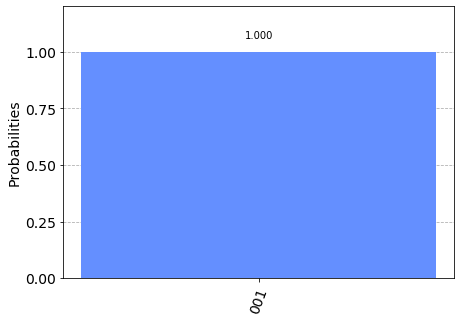

In [8]:
backend = Aer.get_backend('qasm_simulator')
shots = 8192
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

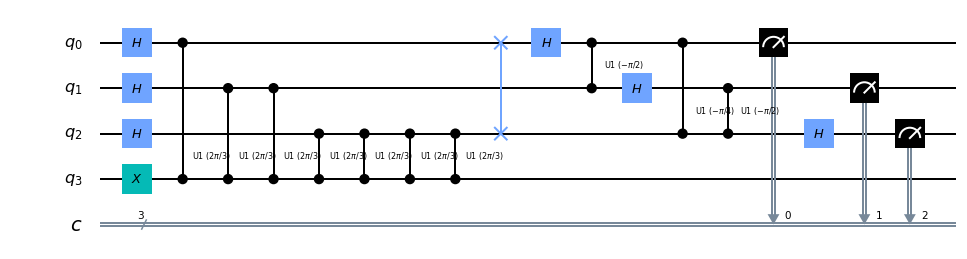

In [9]:
# 创建电路
qpe2 = QuantumCircuit(4, 3)
for qubit in range(3):
    qpe2.h(qubit)
# 制备本征态
qpe2.x(3)

# U变换
angle = 2*math.pi/3 
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cu1(angle, counting_qubit, 3);
    repetitions *= 2

# 逆傅里叶变换
qft_dagger(qpe2, 3)

# 测量
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw(output='mpl')

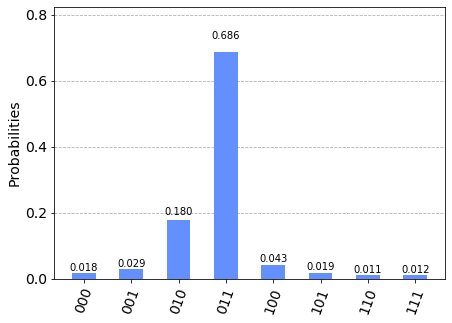

In [10]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [11]:
qpe3 = QuantumCircuit(10, 9)

for qubit in range(9):
    qpe3.h(qubit)

qpe3.x(9)

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(9):
    for i in range(repetitions):
        qpe3.cu1(angle, counting_qubit, 9);
    repetitions *= 2

qft_dagger(qpe3, 9)

for n in range(9):
    qpe3.measure(n,n)



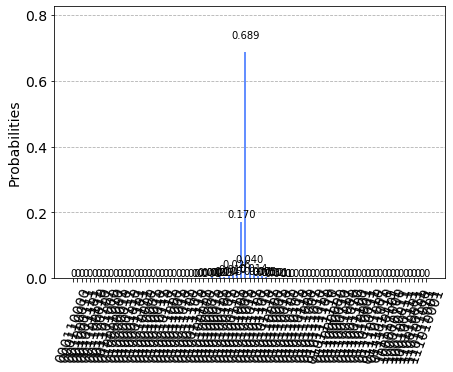

In [12]:
backend = Aer.get_backend('qasm_simulator')
shots = 8192
results = execute(qpe3, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [13]:
print(answer)

{'100000111': 1, '011010011': 1, '010011111': 5, '001001101': 1, '010110111': 5, '010101101': 111, '010110101': 8, '010111000': 2, '010100110': 33, '010110010': 12, '011101001': 1, '011010001': 1, '010011100': 2, '100100111': 1, '010010111': 1, '010001101': 2, '100010011': 1, '010001011': 3, '111010001': 1, '010000110': 1, '010101100': 326, '010111100': 1, '010000011': 1, '010010000': 1, '011001010': 2, '010111010': 2, '010010110': 3, '010101001': 212, '010100001': 5, '011000000': 2, '010010001': 1, '011001100': 1, '010100111': 44, '010111001': 1, '010001111': 2, '010011101': 4, '010011011': 3, '010101110': 55, '001100101': 1, '010000010': 1, '010011010': 4, '110101011': 1, '011010110': 1, '010100000': 3, '011000010': 2, '011101111': 1, '001101000': 1, '110111001': 1, '010101000': 84, '010110100': 6, '010111011': 2, '010110001': 13, '010101010': 1389, '010110011': 10, '010010011': 1, '011111000': 1, '001100010': 1, '100101101': 1, '010100101': 28, '000110011': 1, '010101011': 5642, '01